# Three Dimensional Data

In [1]:
import numpy as np
import matplotlib as mpl
import matplotlib.pylab as plt
%matplotlib inline 

import sys

print('Matplotlib Version: ' + mpl.__version__)
print('NumPy Version: ' + np.version.full_version)
print('Python Version: ' + sys.version)

import datetime
now  = datetime.datetime.now().isoformat()
print('Ran on ' + now)

Matplotlib Version: 3.1.1
NumPy Version: 1.17.3+intel.0
Python Version: 3.7.5 (default, Oct 25 2019, 10:52:18) 
[Clang 4.0.1 (tags/RELEASE_401/final)]
Ran on 2019-12-06T15:22:12.974094


In [2]:
X1,X2 = np.meshgrid(*[np.linspace(-1,1,100)]*2)
F = (1.0 + (1.0/3.0)/(2.0 * X1 + X2 + 7.0/2.0) ) * np.exp(- (0.5 * (X2-1.0/5.0) * (X1 + 1.0))**2)

def _set_axis(ax,z=True):
    r =0.01
    if z:
        ax.set_zlim([0.25, 1.67])
    ax.set_xlim([-1-2*r, 1+2*r])
    ax.set_ylim([-1-2*r, 1+2*r])
    ax.set_xlabel('x1');ax.set_ylabel('x2')
    #ax.set_aspect('equal')

## 2D Plots

### Countour


`contourf` does *not* include the lines so it is helpful to set them yourself.


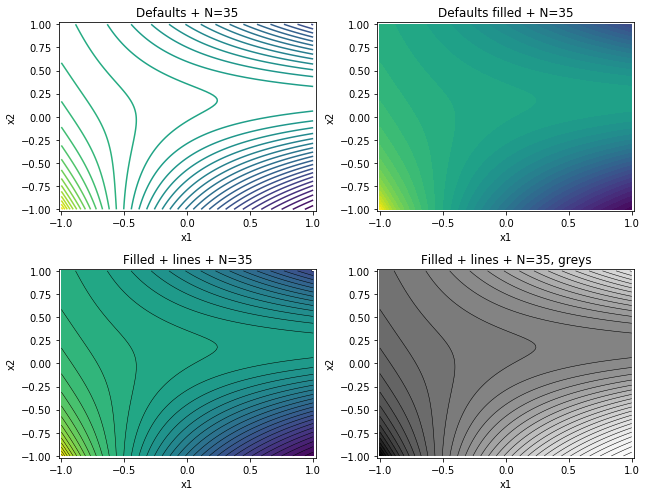

In [3]:
fig,axes = plt.subplots(2,2,figsize=(9,7))

axes[0,0].contour(X1,X2,F,35)
axes[0,0].set_title('Defaults + N=35')

axes[0,1].contourf(X1,X2,F,35)
axes[0,1].set_title('Defaults filled + N=35')

axes[1,0].contourf(X1,X2,F,35)
axes[1,0].contour(X1,X2,F,35,colors='k',linewidths =0.5 )
axes[1,0].set_title('Filled + lines + N=35')

axes[1,1].contourf(X1,X2,F,35,cmap=plt.cm.Greys)
axes[1,1].contour(X1,X2,F,35,colors='k',linewidths =0.5 )
axes[1,1].set_title('Filled + lines + N=35, greys')

for ax in axes.ravel():
    _set_axis(ax,z=False)

fig.tight_layout()

### Pseudocolors (and Pseudocolors with Contours)

To demonstrate this better, we will use fewer bins. Also pay careful attention to how things are cut off

In [4]:
x12E = np.linspace(-1,1,16) # edges
x12C = 0.5 * (x12E[1:] + x12E[:-1])
x1E,x2E = np.meshgrid(x12E,x12E) # 16 edges
x1C,x2C = np.meshgrid(x12C,x12C) # 15 centers

f = (1.0 + (1.0/3.0)/(2.0 * x1C + x2C + 7.0/2.0) ) * np.exp(- (0.5 * (x2C-1.0/5.0) * (x1C + 1.0))**2)


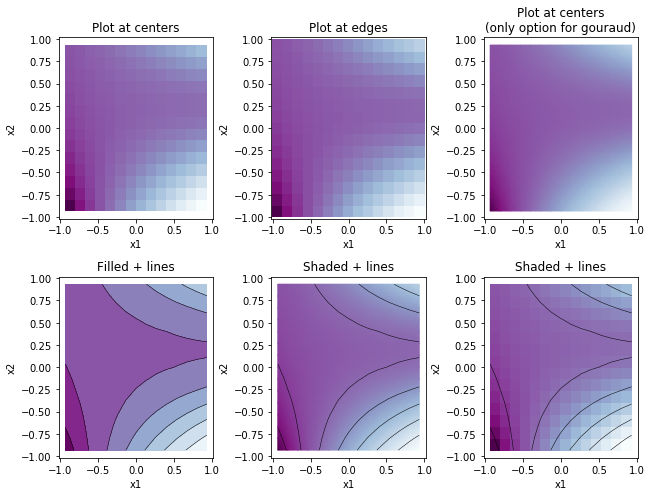

In [5]:
fig,axes = plt.subplots(2,3,figsize=(9,7))

cmap = plt.cm.BuPu
levels = 10

axes[0,0].pcolormesh(x1C,x2C,f,cmap=cmap)
axes[0,0].set_title('Plot at centers')

axes[0,1].pcolormesh(x1E,x2E,f,cmap=cmap)
axes[0,1].set_title('Plot at edges')

axes[0,2].pcolormesh(x1C,x2C,f,cmap=cmap,shading='gouraud')
axes[0,2].set_title('Plot at centers\n(only option for gouraud)')

axes[1,0].contourf(x1C,x2C,f,levels,cmap=cmap)
axes[1,0].contour(x1C,x2C,f,levels,colors='k',linewidths =0.5 )
axes[1,0].set_title('Filled + lines')

axes[1,1].pcolormesh(x1C,x2C,f,cmap=cmap,shading='gouraud')
axes[1,1].contour(x1C,x2C,f,levels,colors='k',linewidths =0.5 )
axes[1,1].set_title('Shaded + lines')

axes[1,2].pcolormesh(x1C,x2C,f,cmap=cmap,shading='flat')
axes[1,2].contour(x1C,x2C,f,levels,colors='k',linewidths =0.5 )
axes[1,2].set_title('Shaded + lines')

for ax in axes.ravel():
    _set_axis(ax,z=False)
fig.tight_layout()  

This is personal preference but I actually really like the look of shaded and lines. You get the advantages of the pseudocolor and contours

## 3D Plots

### Difference from Matlab

Unlike Matlab, there is nothing wrong with setting your grid with a lot of points. You then use `cstride` and `rstride` to control that. In this example, I set with 100 points but use `cstride=4` to only plot a line every 4 spaces and `rstride=3` to plot a line every 3 in the other direction

### Important

You must have the following. Also, you will see that you build the axis differently

In [6]:
from mpl_toolkits.mplot3d import Axes3D

### Surface

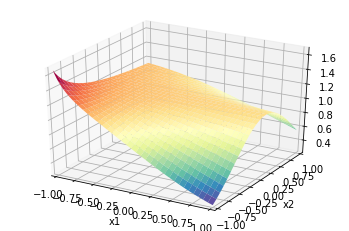

In [7]:
fig = plt.figure(num=1)
ax = fig.add_subplot(111,projection='3d')
SF = ax.plot_surface(X1,X2,F,rstride=4,cstride=3,cmap=plt.cm.Spectral_r)
_set_axis(ax)

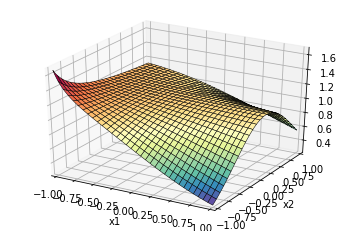

In [8]:
fig = plt.figure(num=1)
ax = fig.add_subplot(111,projection='3d')
SF = ax.plot_surface(X1,X2,F,rstride=4,cstride=3,cmap=plt.cm.Spectral_r,
                     linewidth=0.5, edgecolors='k')
_set_axis(ax)

### Wiremesh

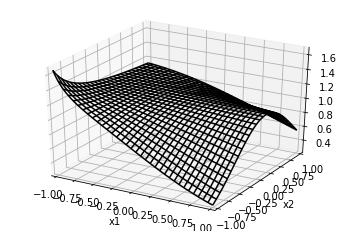

In [9]:
fig = plt.figure(num=1)
ax = fig.add_subplot(111,projection='3d')
SF = ax.plot_wireframe(X1,X2,F,rstride=4,cstride=3,color='k')
_set_axis(ax)

### White panes

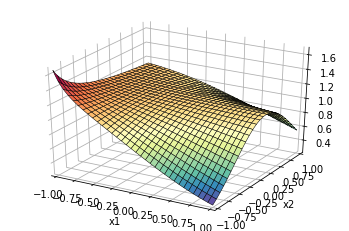

In [10]:
fig = plt.figure(num=1)
ax = fig.add_subplot(111,projection='3d')
SF = ax.plot_surface(X1,X2,F,rstride=4,cstride=3,cmap=plt.cm.Spectral_r,
                     linewidth=0.5, edgecolors='k')
_set_axis(ax)

# White edges
ax.w_xaxis.set_pane_color((1.0, 1.0, 1.0, 0.0)) 
ax.w_yaxis.set_pane_color((1.0, 1.0, 1.0, 0.0)) 
ax.w_zaxis.set_pane_color((1.0, 1.0, 1.0, 0.0)) 

### Surface and contour

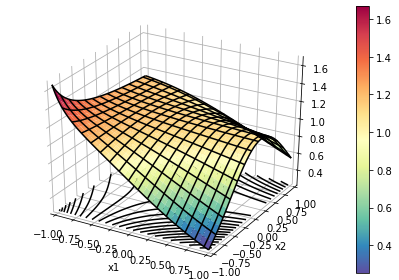

In [11]:
cmap=plt.cm.Spectral_r
fig = plt.figure(num=1)
ax = fig.add_subplot(111,projection='3d')
SF = ax.plot_surface(X1,X2,F,rstride=4,cstride=3,cmap=cmap)
SF = ax.plot_wireframe(X1,X2,F,rstride=8,cstride=6,color='k')

CS = ax.contour(X1,X2,F,25,zdir='z',offset=0.25, colors='k')

# Colorbar
m = plt.cm.ScalarMappable(cmap=cmap)
m.set_array(F)
fig.colorbar(m)

ax.w_xaxis.set_pane_color((1.0, 1.0, 1.0, 0.0)) 
ax.w_yaxis.set_pane_color((1.0, 1.0, 1.0, 0.0)) 
ax.w_zaxis.set_pane_color((1.0, 1.0, 1.0, 0.0)) 

_set_axis(ax)
fig.tight_layout()

### Rotate & Zoom

Zoom is useful when labels sometimes get cut off

See below too for how to do this interactivly in a notebook

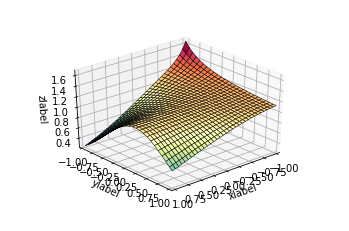

In [12]:
fig = plt.figure(num=1)
ax = fig.add_subplot(111,projection='3d')
SF = ax.plot_surface(X1,X2,F,rstride=4,cstride=3,cmap=plt.cm.Spectral_r,
                     linewidth=0.5, edgecolors='k')

_set_axis(ax)
ax.set(xlabel='xlabel',ylabel='ylabel',zlabel='zlabel')

# Rotate
ax.view_init(35,49)

# Distance
ax.dist = 13

### Interactive

This shows how to do the plots interactive by changing 

    %matplotlib inline
   
to

    %matplotlib qt

But it is to be commented out in the main one.

It may need to be run twice...

In [13]:
%matplotlib qt
#%matplotlib inline
fig = plt.figure(num=1)
ax = fig.add_subplot(111,projection='3d')
SF = ax.plot_wireframe(X1,X2,F,rstride=4,cstride=3,color='k')
_set_axis(ax)